In [ ]:
import numpy as np
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sympy import symbols, diff
from math import *

In [410]:
#const
x0 = 10.0
y0 = 10.0
g_alpha = 0.067 
alpha = g_alpha
EPS = 1e-8
cnt_grad = 0 
cnt_function = 0
map_functions = dict()

In [411]:
def f1(parameters):
  global cnt_function
  cnt_function += 1
  x, y = parameters
  return x * x - 4 * x * y + 8 * y * y

def df1x(parameters):
  global cnt_grad
  cnt_grad += 1
  x, y = parameters
  return 2 * x - 4 * y

def df1y(parameters):
  global cnt_grad
  x, y = parameters
  return -4 * x + 16 * y

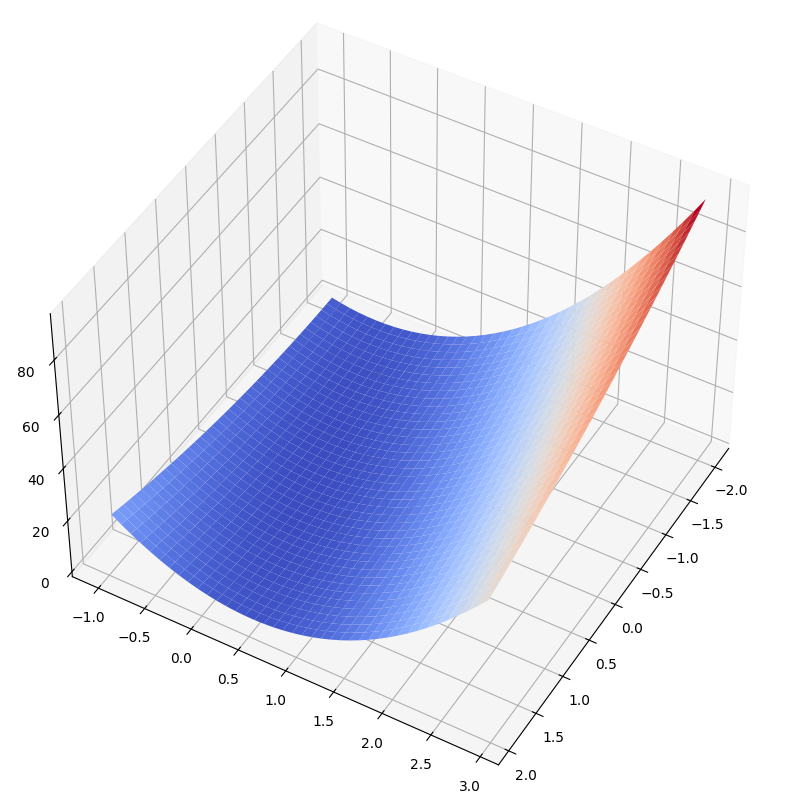

In [412]:
fig = plt.figure(figsize=[15, 10])
ax = fig.add_subplot(projection='3d')

# Задаем угол обзора
ax.view_init(45, 30)

# Создаем данные для графика
X1 = np.arange(-2, 2, 0.1)
Y1 = np.arange(-1, 3, 0.1)
X1, Y1 = np.meshgrid(X1, Y1)
Z1 = f1(np.array([X1,Y1]))
cnt_function -= 1

# Рисуем поверхность f1
surf = ax.plot_surface(X1, Y1, Z1, cmap=cm.coolwarm)
plt.show()

In [413]:
map_functions[f1.__name__] = (f1, df1x, df1y) 

In [414]:
def f2(parameters):
  global cnt_function
  cnt_function += 1
  x, y = parameters
  return 10 * x * x + 3 * x * y + 17 * y * y + 90 * x + 7 * y

def df2x(parameters):
  global cnt_grad
  cnt_grad += 1
  x, y = parameters
  return 20 * x + 3 * y + 90

def df2y(parameters):
  x, y = parameters
  return 3 * x + 34 * y + 7

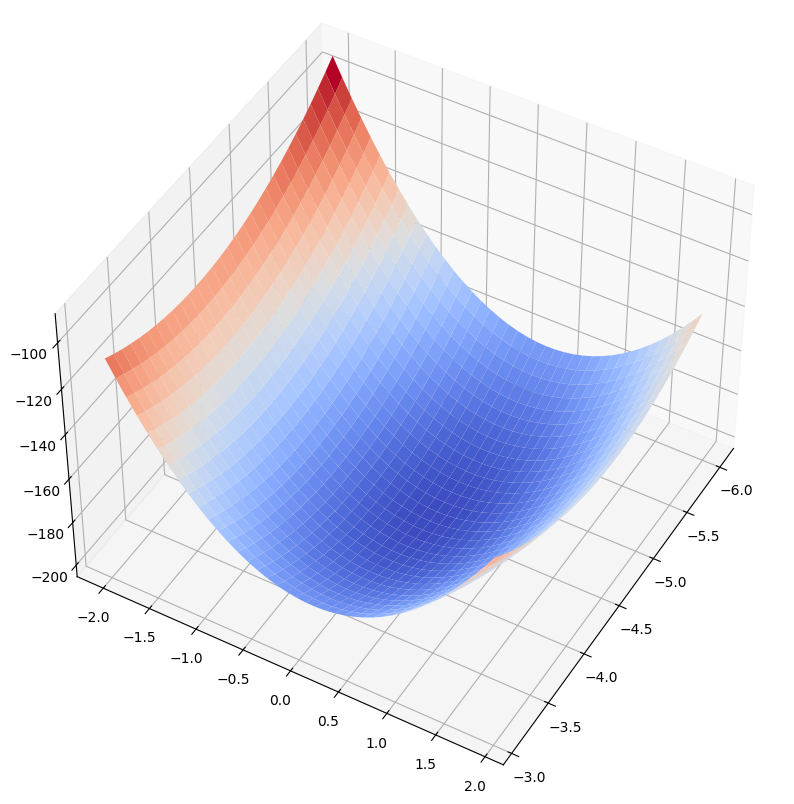

In [415]:
fig = plt.figure(figsize=[15, 10])
ax = fig.add_subplot(projection='3d')

# Задаем угол обзора
ax.view_init(45, 30)

# Создаем данные для графика
X2 = np.arange(-6, -3, 0.1)
Y2 = np.arange(-2, 2, 0.1)
X2, Y2 = np.meshgrid(X2, Y2)
Z2 = f2(np.array([X2,Y2]))
cnt_function -= 1

# Рисуем поверхность f1
surf = ax.plot_surface(X2, Y2, Z2, cmap=cm.coolwarm)
plt.show()

In [416]:
map_functions[f2.__name__] = (f2, df2x, df2y)

In [417]:
def f_dop(parameters):
  global cnt_function
  cnt_function += 1
  x, y = parameters
  return x * x + 2 * x * y + y * y

def df_dopx(parameters):
  global cnt_grad
  cnt_grad += 1
  x, y = parameters
  return 2 * x + 2 * y

def df_dopy(parameters):
  x, y = parameters
  return 2 * x + 2 * y

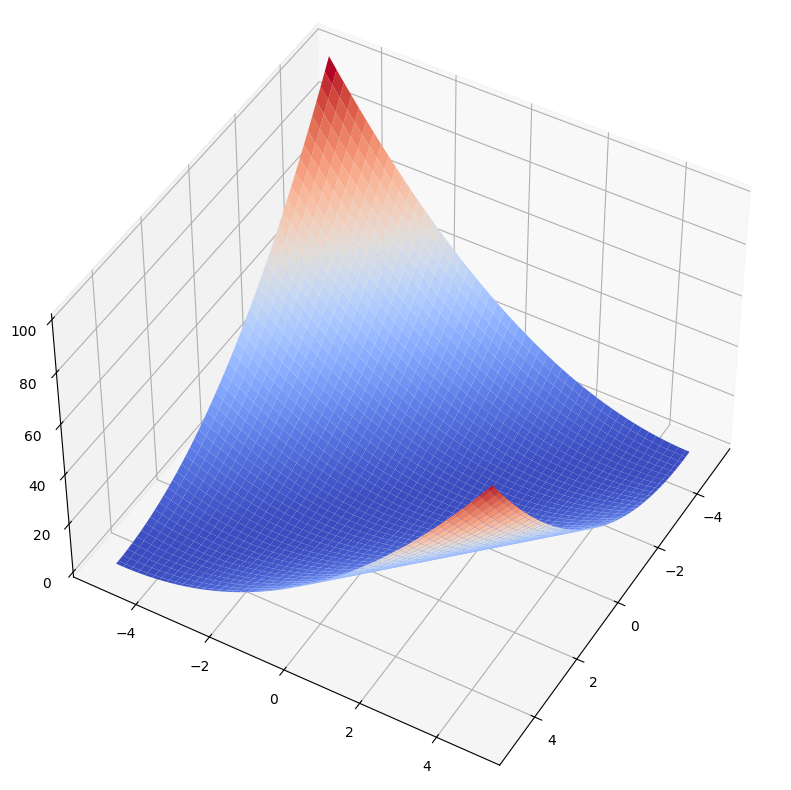

In [418]:
fig = plt.figure(figsize=[15, 10])
ax = fig.add_subplot(projection='3d')

# Задаем угол обзора
ax.view_init(45, 30)

# Создаем данные для графика
X2 = np.arange(-5, 5, 0.1)
Y2 = np.arange(-5, 5, 0.1)
X2, Y2 = np.meshgrid(X2, Y2)
Z2 = f_dop(np.array([X2,Y2]))
cnt_function -= 1

# Рисуем поверхность f1
surf = ax.plot_surface(X2, Y2, Z2, cmap=cm.coolwarm)
plt.show()

In [419]:
map_functions[f_dop.__name__] = (f_dop, df_dopx, df_dopy)

In [420]:
def f_multimodal(parameters):
  res = 10 * 2
  x, y = parameters

  # for x in parametrs:
  res += (x * x - 10 * cos(2 * pi * x))
  res += (y * y - 10 * cos(2 * pi * y))
  return res

def df_multimodal(i):
  def df_dop(parametrs):
    x = parametrs[i]
    return 2 * x + 10 * sin(2 * pi * x) * 2 * pi
  return df_dop;

In [421]:
map_functions[f_multimodal.__name__] = (f_multimodal, df_multimodal(0), df_multimodal(1))

TypeError: only length-1 arrays can be converted to Python scalars

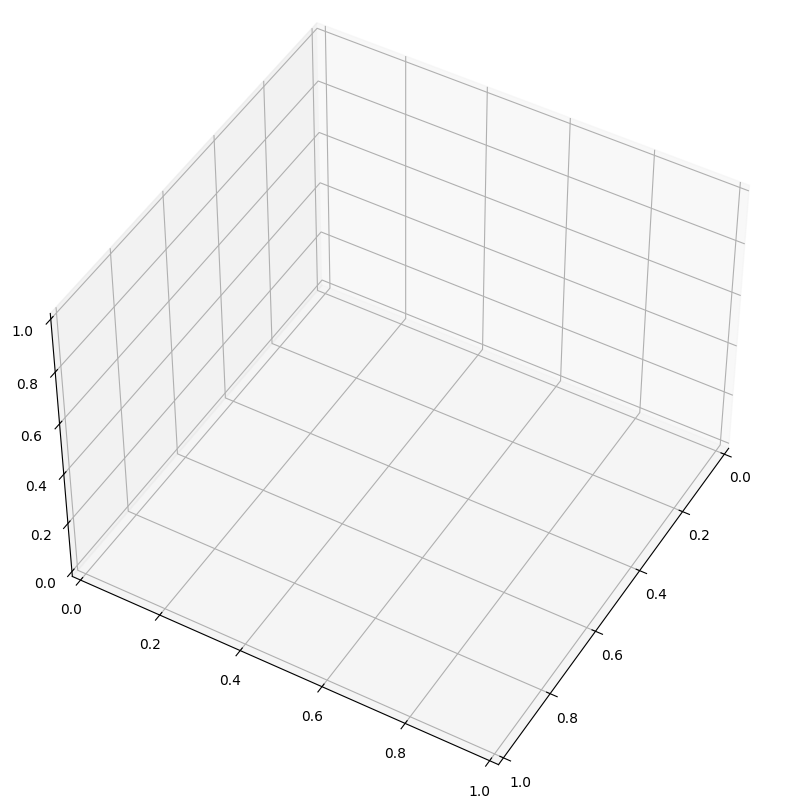

In [422]:
fig = plt.figure(figsize=[15, 10])
ax = fig.add_subplot(projection='3d')

# Задаем угол обзора
ax.view_init(45, 30)

# Создаем данные для графика
X2 = np.arange(-5, 5, 0.1)
Y2 = np.arange(-5, 5, 0.1)
X2, Y2 = np.meshgrid(X2, Y2)
Z2 = f_multimodal(np.array([X2,Y2]))
cnt_function -= 1

# Рисуем поверхность f1
surf = ax.plot_surface(X2, Y2, Z2, cmap=cm.coolwarm)
plt.show()

In [ ]:
def gradient_descent(f, dfx, dfy, x0, y0, alpha_f):
  global alpha, EPS
  alpha = g_alpha
  x, y = x0, y0
  last = f([x, y])
  num_iters = 0
  while True:
    parameters = np.array([x, y])
    alp = alpha_f(f, dfx, dfy, x, y)
    x, y = x - alp * dfx(parameters), y - alp * dfy(parameters)
    new = f([x, y])
    if (abs(new - last) < EPS or num_iters > 1000):
      break
    last = new
    num_iters += 1
  return x, y, num_iters

In [ ]:
def gradient_task(x0, y0, alpha, f, dfx, dfy):
  global cnt_grad, cnt_function
  cnt_grad = 0
  cnt_function = 0
  x_min, y_min, num_iters = gradient_descent(f, dfx, dfy, x0, y0, alpha)
  parameters = np.array([x_min, y_min])
  print("Минимум функции находится в точке: " + f.__name__ + "(", x_min,", ", y_min, ") = ", f(parameters), "\n",
        " num_iters = ", num_iters, ", cnt_function = ", cnt_function, ", cnt_gradiation = ", cnt_grad, sep = "")

In [ ]:
def alpha_const(f, dfx, dfy, x, y):
  global alpha
  return alpha

In [ ]:
def alpha_minimize(f, dfx, dfy, x, y):
  global alpha, EPS
  while f([x, y]) < f([x - alpha * dfx([x, y]), y - alpha * dfy([x, y])]):
    alpha *= 0.8
    if alpha < EPS:
      break
  return alpha

In [423]:
def alpha_ternary(f, dfx, dfy, x, y):
  global EPS
  l = 0
  r = 10
  while r - l > EPS:
    m1 = (2 * l + r) / 3
    m2 = (l + 2 * r) / 3
    dx = dfx([x, y])
    dy = dfy([x, y])
    if f([x - m1 * dx, y - m1 * dy]) > f([x - m2 * dx, y - m2 * dy]):
      l = m1
    else:
      r = m2
  return (l + r) / 2

In [424]:
for func in map_functions.keys():
  f_tmp, df_tmpx, df_tmpy = map_functions[func]
  gradient_task(x0, y0, alpha_const, f_tmp, df_tmpx, df_tmpy)

Минимум функции находится в точке: f1(0.0003662032694068719, 9.725056509492774e-05) = 6.731231425683082e-08
 num_iters = 159, cnt_function = 162, cnt_gradiation = 160
Минимум функции находится в точке: f2(9.358257468740228e+120, 4.559272260978783e+121) = 3.7493613173704065e+244
 num_iters = 1001, cnt_function = 1004, cnt_gradiation = 1002
Минимум функции находится в точке: f_dop(5.199147771979883e-05, 5.199147771979883e-05) = 1.0812455021953353e-08
 num_iters = 38, cnt_function = 41, cnt_gradiation = 39
Минимум функции находится в точке: f_multimodal(2.2631550624031487, 2.2631550624031487) = 31.894973876250702
 num_iters = 1001, cnt_function = 0, cnt_gradiation = 0


In [425]:
for func in map_functions.keys():
  f_tmp, df_tmpx, df_tmpy = map_functions[func]
  gradient_task(x0, y0, alpha_minimize, f_tmp, df_tmpx, df_tmpy)

Минимум функции находится в точке: f1(0.0003662032694068719, 9.725056509492774e-05) = 6.731231425683082e-08
 num_iters = 159, cnt_function = 482, cnt_gradiation = 320
Минимум функции находится в точке: f2(-4.529054195661896, 0.19377433675234032) = -203.1296572075926
 num_iters = 81, cnt_function = 250, cnt_gradiation = 165
Минимум функции находится в точке: f_dop(5.199147771979883e-05, 5.199147771979883e-05) = 1.0812455021953353e-08
 num_iters = 38, cnt_function = 119, cnt_gradiation = 78
Минимум функции находится в точке: f_multimodal(1.9899191133665555, 1.9899191133665555) = 7.959662399850345
 num_iters = 58, cnt_function = 0, cnt_gradiation = 0


In [426]:
for func in map_functions.keys():
  f_tmp, df_tmpx, df_tmpy = map_functions[func]
  gradient_task(x0, y0, alpha_ternary, f_tmp, df_tmpx, df_tmpy)

Минимум функции находится в точке: f1(4.3150705723974036e-05, 1.1219182849837063e-05) = 9.324812845545284e-10
 num_iters = 12, cnt_function = 1367, cnt_gradiation = 689
Минимум функции находится в точке: f2(-4.52905834032054, 0.19373919256673572) = -203.12965722791606
 num_iters = 10, cnt_function = 1157, cnt_gradiation = 583
Минимум функции находится в точке: f_dop(1.9683604414690627e-16, 1.9683604414690627e-16) = 1.5497771310161134e-31
 num_iters = 1, cnt_function = 212, cnt_gradiation = 106
Минимум функции находится в точке: f_multimodal(-0.9949586382392984, -0.9949586382392984) = 1.9899181141865796
 num_iters = 1, cnt_function = 0, cnt_gradiation = 0


In [427]:
for func in map_functions.keys():
  f_tmp, df_tmpx, df_tmpy = map_functions[func]
  z = np.array([x0, y0])
  res1 = minimize(f_tmp, z, method='nelder-mead', options={'xatol': EPS, 'disp': True, 'maxiter': 1000})
  print("Минимум функции находится в точке: " + func + "(", res1.x[0],", ", res1.x[1], ") = ", f_tmp(res1.x), sep = "")

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 79
         Function evaluations: 154
Минимум функции находится в точке: f1(-1.8465642619005821e-09, 4.5582754562013854e-10) = 8.438889005425098e-18
Optimization terminated successfully.
         Current function value: -203.129657
         Iterations: 74
         Function evaluations: 149
Минимум функции находится в точке: f2(-4.529061084227502, 0.1937406612398897) = -203.1296572280179
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 580
         Function evaluations: 1205
Минимум функции находится в точке: f_dop(0.25, -0.25) = 0.0
Optimization terminated successfully.
         Current function value: 198.983249
         Iterations: 62
         Function evaluations: 122
Минимум функции находится в точке: f_multimodal(9.948716363539702, 9.948716358860182) = 198.98324880638924


In [428]:
for x in [0, 1, 2, 5, 10, 100, 1000]:
  for dx in [-1, 1]:
    for y in [0, 1, 2, 5, 10, 100, 1000]:
      for dy in [-1, 1]:
        nx = x * dx
        ny = y * dy
        gradient_task(nx, ny, alpha_const, f1, df1x, df1y)
    print()
    print()

Минимум функции находится в точке: f1(0.0, 0.0) = 0.0
 num_iters = 0, cnt_function = 3, cnt_gradiation = 1
Минимум функции находится в точке: f1(0.0, 0.0) = 0.0
 num_iters = 0, cnt_function = 3, cnt_gradiation = 1
Минимум функции находится в точке: f1(-0.0003771116190013105, -0.00010014743481438816) = 7.138219765827808e-08
 num_iters = 99, cnt_function = 102, cnt_gradiation = 100
Минимум функции находится в точке: f1(0.0003771116190013105, 0.00010014743481438816) = 7.138219765827808e-08
 num_iters = 99, cnt_function = 102, cnt_gradiation = 100
Минимум функции находится в точке: f1(-0.0003694099038678366, -9.810213317045795e-05) = 6.84963070014841e-08
 num_iters = 110, cnt_function = 113, cnt_gradiation = 111
Минимум функции находится в точке: f1(0.0003694099038678366, 9.810213317045795e-05) = 6.84963070014841e-08
 num_iters = 110, cnt_function = 113, cnt_gradiation = 111
Минимум функции находится в точке: f1(-0.0003723180289607226, -9.887442777369285e-05) = 6.957900617651653e-08
 num_i